# Дипломная работа по курсу "Python для анализа данных"

In [1]:
import pandas as pd
import numpy as np
import statistics
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## 1. Загрузить файл hr.csv.

### Прочитаем данные

In [2]:
df = pd.read_csv('HR.csv')
df.tail(3)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


**описание:**

*  satisfaction_level - уровень удовлетворенности
*  last_evaluation - последняя оценка
*  number_project - номер проекта
*  average_montly_hours - среднее количество часов в месяц
*  time_spend_company - стаж в компании (лет)
*  Work_accident - несчастный случай на работе
*  left - уволенные
*  promotion_last_5years - продвижение за последние 5 лет
*  sales - отдел
*  salary - зарплата

### Посмотрим на качество данных (наличие пропущенных значений)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).

### Получим основные статистики методом describe

In [4]:
# метод выводит следующие статистики из требуемых:
# среднее, медиана (50% или 2-ой квартиль), мин/макс, сред.отклонение

df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Рассчитаем моду

In [5]:
# создадим список наименований столбцов

names = list(df)
names

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [6]:
# если все значения в столбцах будут уникальными, мода для них не определится
# исключим нечисловые значения + используем конструкцию try / except

for i in range(len(names)):
    if (df[names[i]]).dtype != object:
        try:
            print(f'{round(statistics.mode(df[names[i]]), 2)} - mode {names[i]}')
        except:
            print('----------')
            print(f'for {names[i]} mode could not be found')
            print('----------')


0.1 - mode satisfaction_level
0.55 - mode last_evaluation
4 - mode number_project
----------
for average_montly_hours mode could not be found
----------
3 - mode time_spend_company
0 - mode Work_accident
0 - mode left
0 - mode promotion_last_5years


## 3. Рассчитать и визуализировать корреляционную матрицу для переменных.

### Заменим данные в столбце sales на числовые

In [7]:
# получим код для каждого значения в столбце sales, используя LabelEncoder
# (это в дальнейшем может пригодиться для построения модели предсказания увольнения сотрудников)

label_encoder = LabelEncoder()
code_sales = label_encoder.fit_transform(df['sales'])

In [8]:
# создадим словарь полученных кодов и их значений

name_dict = dict(enumerate(label_encoder.classes_))
print(name_dict)

{0: 'IT', 1: 'RandD', 2: 'accounting', 3: 'hr', 4: 'management', 5: 'marketing', 6: 'product_mng', 7: 'sales', 8: 'support', 9: 'technical'}


In [9]:
# добавим значения кодов sales в новый столбец

df['Code_sales'] = code_sales
df.tail(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Code_sales
14995,0.37,0.48,2,160,3,0,1,0,support,low,8
14996,0.37,0.53,2,143,3,0,1,0,support,low,8
14997,0.11,0.96,6,280,4,0,1,0,support,low,8
14998,0.37,0.52,2,158,3,0,1,0,support,low,8


### Заменим данные в столбце salary на числовые

In [10]:
# посмотрим на уникальные значения

df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [11]:
# используя метод loc добавим соответствующие значения в новый столбец

df.loc[df['salary'] == 'low', 'Level_salary'] = 0
df.loc[df['salary'] == 'medium', 'Level_salary'] = 1
df.loc[df['salary'] == 'high', 'Level_salary'] = 2

df.tail(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,Code_sales,Level_salary
14995,0.37,0.48,2,160,3,0,1,0,support,low,8,0.0
14996,0.37,0.53,2,143,3,0,1,0,support,low,8,0.0
14997,0.11,0.96,6,280,4,0,1,0,support,low,8,0.0
14998,0.37,0.52,2,158,3,0,1,0,support,low,8,0.0


### Рассчитаем и построим матрицу корреляций

In [12]:
# корреляционная матрица

matrix = df.corr()
matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Code_sales,Level_salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,0.098119
Code_sales,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,-0.043081
Level_salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,-0.043081,1.000000


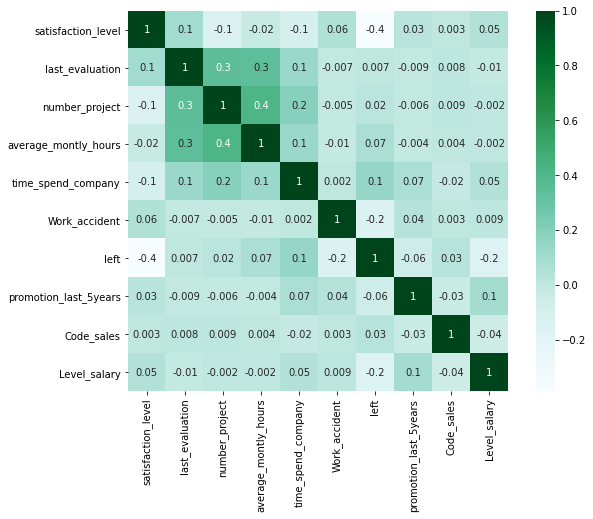

In [13]:
# визуализация

plt.figure(figsize=(10, 7))
sns.heatmap(matrix, cmap='BuGn', annot=True, fmt='.1g', square=True)

Корреляционная матрица строится по значениям рассчитанных коэффициентов корреляции Пирсона.

Полученные результаты говорят об отсутствии сильной линейной зависимости между переменными.

Максимальное значение - это +0,4: связь проекта со средним количеством часов (в месяц), а также -0,4: обратная зависимость уровня удовлетворенности и уволенных сотрудников. Но эти связи показывают слабую корреляцию.

## 4. Визуализировать несколько взаимосвязей между переменными.

### Построим график среднего уровня удовлетворенности работающих и уволенных сотрудников по отделам

In [14]:
# подготовим данные для графика

sales_level_left = df.groupby(['sales', 'left']).mean()[['satisfaction_level']]
sales_level_left

satisfaction_level
sales       left                    
IT          0               0.677170
            1               0.411868
RandD       0               0.653799
            1               0.432810
accounting  0               0.647211
            1               0.402598
hr          0               0.666679
            1               0.433395
management  0               0.654861
            1               0.422857
marketing   0               0.669878
            1               0.453153
product_mng 0               0.658466
            1               0.481566
sales       0               0.668548
            1               0.447663
support     0               0.673799
            1               0.450901
technical   0               0.668319
            1               0.432525

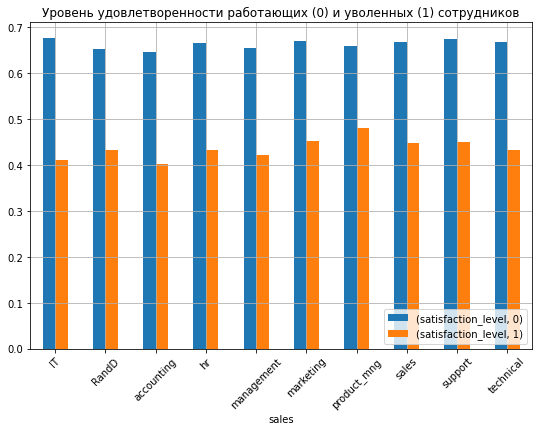

In [15]:
# построим график

from pylab import rcParams
rcParams['figure.figsize'] = 9,6

sales_level_left.unstack('left').plot(kind='bar', rot=45)

plt.title('Уровень удовлетворенности работающих (0) и уволенных (1) сотрудников')
plt.legend(loc='lower right')
plt.grid()

Средний уровень удовлетворенности по отделам сотрудников в каждой категории - работающие и уволенные - в целом одинаков. При этом у первых наибольшая оценка в отделах IT и "поддержке", во второй группе - у отдела продуктовых менеджеров.

Учитывая незначительную разницу в полученных средних значениях, можно предположить, что уровень удовлетворенности не зависит от работы в том или ином отделе.

### Построим график среднего уровня удовлетворенности работающих и уволенных сотрудников на проектах

In [16]:
# подготовим данные для графика

project_level_left = df.groupby(['number_project', 'left']).mean()[['satisfaction_level']]
project_level_left

satisfaction_level
number_project left                    
2              0               0.604397
               1               0.412948
3              0               0.689618
               1               0.579861
4              0               0.689181
               1               0.752689
5              0               0.657971
               1               0.752337
6              0               0.456570
               1               0.128366
7              1               0.118711

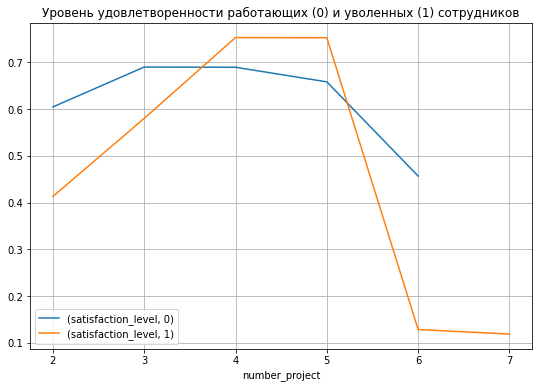

In [17]:
# построим график

project_level_left.unstack('left').plot()

plt.title('Уровень удовлетворенности работающих (0) и уволенных (1) сотрудников')
plt.legend(loc='lower left')
plt.grid()

В отличие от предыдущего "ровного" графика по отделам, данный график показывает сильную зависимость уровня удовлетворенности сотрудников от работы на конкретном проекте.

Обращают внимание последние проекты: на шестом значение показателя удовлетворенности заметно снизилось, особенно у уволенных сотрудников - упало почти до нуля; на последнем, седьмом, проекте работающих сотрудников не осталось вообще - его выполнили сотрудники, которых потом уволили.

Вполне вероятно, что:
* часть сотрудников нанимали только на конкретный проект;
* на шестом и седьмом проектах существенно изменились условия труда;
* если это "полные" данные - компания закрылась или же на последнем проекте анкетировали только определенную часть сотрудников.

### Построим график среднемесячного количества часов работы на проектах сотрудников с разным доходом

In [18]:
# подготовим данные для графика

project_hours_salary = df.groupby(['number_project', 'Level_salary']).mean()[['average_montly_hours']]
project_hours_salary

average_montly_hours
number_project Level_salary                      
2              0.0                     159.134673
               1.0                     160.828540
               2.0                     168.800000
3              0.0                     196.793412
               1.0                     197.349677
               2.0                     201.360294
4              0.0                     206.056061
               1.0                     204.438220
               2.0                     203.375000
5              0.0                     212.885345
               1.0                     212.242702
               2.0                     206.746939
6              0.0                     242.791469
               1.0                     238.153846
               2.0                     206.630137
7              0.0                     278.201389
               1.0                     272.889908
               2.0                     290.000000

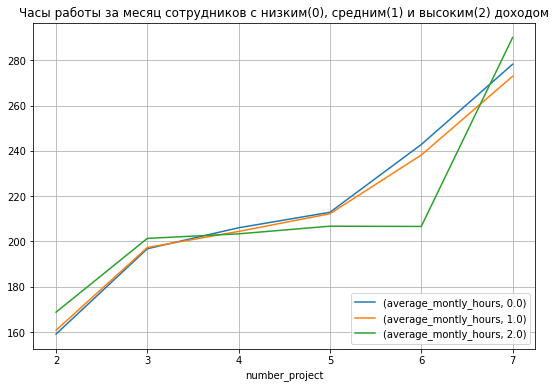

In [19]:
# построим график

project_hours_salary.unstack('Level_salary').plot()

plt.title('Часы работы за месяц сотрудников с низким(0), средним(1) и высоким(2) доходом')
plt.legend(loc='lower right')
plt.grid()

Этот график подтверждает версию об изменении условий работы большинства сотрудников на последних проектах - шестом и седьмом.

Нормативное количество рабочих часов в месяц:
* при 5-ти дневной рабочей неделе (22 дня по 8 часов) - это 176 часов;
* при 6-ти дневной (26 дней по 8 часов) - это 208 часов.

Информации о том, какой в компании установлен график работы, нет, но ориентируясь на нормативные данные понятны явные переработки сотрудников на последних проектах.

### Построим график зависимости уровня удовлетворенности от среднемесячного количества часов работы по уволенным сотрудникам

In [20]:
# подготовим данные для графика

left_hours_level = df.loc[df['left'] == 1].groupby('average_montly_hours').mean()[['satisfaction_level']]
left_hours_level = left_hours_level.reset_index()
left_hours_level

,average_montly_hours,satisfaction_level
0,126,0.406000
1,127,0.399649
2,128,0.417447
3,129,0.418723
4,130,0.421429
...,...,...
159,306,0.107778
160,307,0.215000
161,308,0.102500
162,309,0.111250


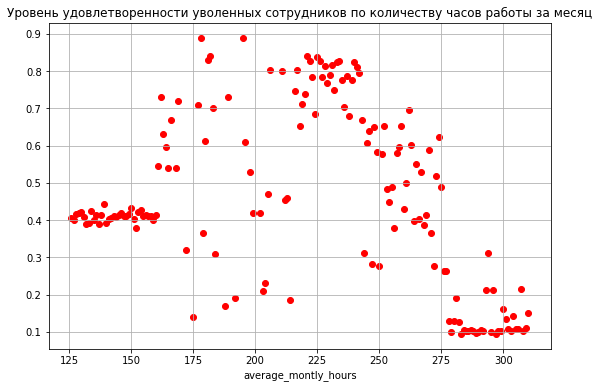

In [21]:
# построим график

plt.scatter(left_hours_level['average_montly_hours'], left_hours_level['satisfaction_level'], c='red')

plt.title('Уровень удовлетворенности уволенных сотрудников по количеству часов работы за месяц')
plt.xlabel('average_montly_hours')
plt.grid()

Как видно из графика, связь двух параметров - уровень удовлетворенности и среднее количество часов работы за месяц - нелинейная.

Тем не менее, после отметки в 225 часов отчетливо виден характер изменений: при дальнейшем увеличении этого показателя на каждые 25 часов уровень удовлетворенности снижается в среднем на две десятых.

Эта обратная зависимость вполне логична и объяснима: у сотрудников должен быть отдых и личное время, в противном случае происходит "выгорание", а это снижение качества жизни и эффективности работы.

### Построим график количества уволенных на проектах сотрудников с разным доходом

In [22]:
# подготовим данные для графика

proj_salary_left = df.loc[df['left'] == 1].groupby(['number_project', 'Level_salary']).count()[['left']]
proj_salary_left

left
number_project Level_salary      
2              0.0            966
               1.0            555
               2.0             46
3              0.0             37
               1.0             32
               2.0              3
4              0.0            249
               1.0            158
               2.0              2
5              0.0            371
               1.0            226
               2.0             15
6              0.0            405
               1.0            237
               2.0             13
7              0.0            144
               1.0            109
               2.0              3

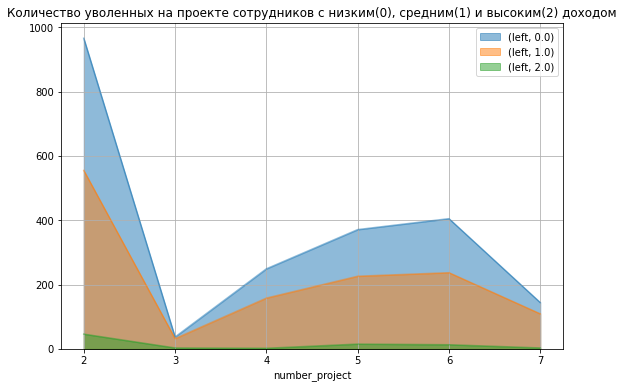

In [23]:
# построим график

proj_salary_left.unstack('Level_salary').plot(kind='area', stacked=False)

plt.title('Количество уволенных на проекте сотрудников с низким(0), средним(1) и высоким(2) доходом')
plt.legend(loc='upper right')
plt.grid()

Больше всего уволенных на 2-ом и 6-ом проектах: для их выполнения, возможно, специально нанимали часть сотрудников.

Между тем распределение по уровню дохода показывает, что увольняли сотрудников с низким и средним доходом почти одинаково (в расчет не берем тех, у кого высокая зарплата - их увольнение не так "масштабно" в связи с их общим небольшим количеством в компании).

Т.о. можно предположить, что увольнение не столько связано с величиной зарплаты, сколько с конкретным проектом.

## 5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

### Гипотеза 1. Уровень удовлетворенности сотрудников с низким и средним уровнем дохода одинаковый.

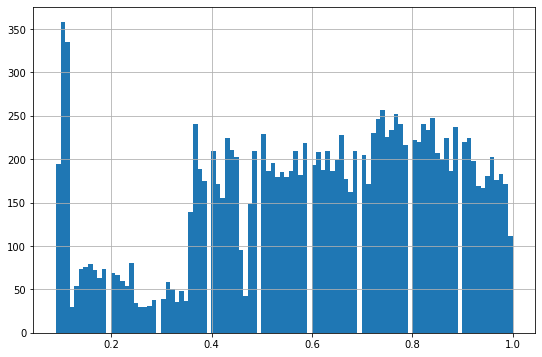

In [24]:
# оценим распределение данных по параметру satisfaction_level

plt.hist(df['satisfaction_level'], bins=100)
plt.grid()

In [25]:
# оставим те значения, распределение которых приблизительно похоже на нормальное

level = df[df['satisfaction_level'] > 0.6]

In [26]:
# создадим две выборки по уровню зарплаты (0 - низкий, 1 - средний)

level_0 = level[level['Level_salary'] == 0]['satisfaction_level']
level_1 = level[level['Level_salary'] == 1]['satisfaction_level']

In [27]:
# рассчитаем дисперсии

round(statistics.variance(level_0), 4), round(statistics.variance(level_1), 4)

(0.0119, 0.0123)

In [28]:
# определим длину

len(level_0), len(level_1)

(3895, 3645)

In [29]:
# т.к. дисперсии практически равны, проведем Т-тест Стьюдента,
# приведя выборки к равной длине (тест "классический")

level_0 = level_0.sample(3600)
level_1 = level_1.sample(3600)

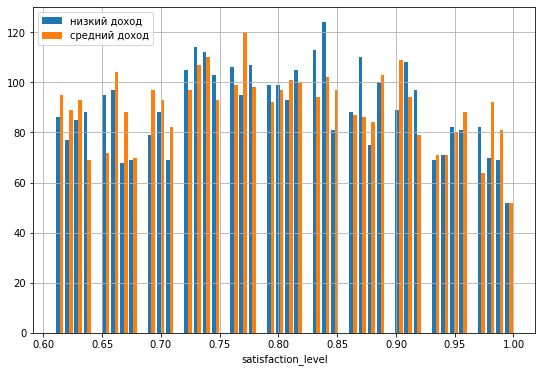

In [30]:
# распределение данных повторяет исходную подвыборку

plt.hist([level_0, level_1], bins=50, label=['низкий доход', 'средний доход'])

plt.legend(loc='upper left')
plt.xlabel('satisfaction_level')
plt.grid()

In [31]:
# Т-тест Стьюдента

sts.ttest_ind(level_0, level_1)


Ttest_indResult(statistic=0.3659284331561031, pvalue=0.7144292326727295)

Полученное значение p-value больше уровня значимости (5% или 0.05), следовательно, мы не можем отвергнуть нулевую гипотезу: уровень удовлетворенности (в диапазоне от 0.6) сотрудников с низким и средним уровнем дохода одинаковый.

### Гипотеза 2. Сотрудники с низким и средним уровнем дохода работают одинаковое количество часов в месяц.

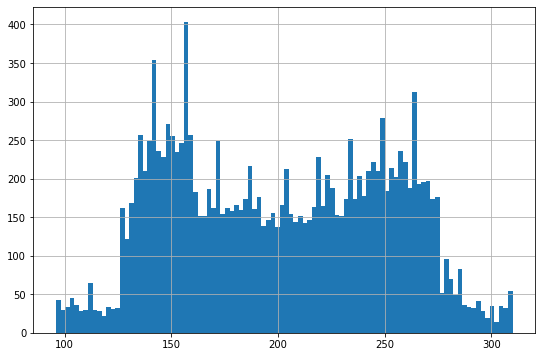

In [32]:
# оценим распределение данных по параметру average_montly_hours

plt.hist(df['average_montly_hours'], bins=100)
plt.grid()

In [33]:
# оставим те значения, распределение которых напоминает нормальное

hours = df[df['average_montly_hours'] > 210]

In [34]:
# также создадим две выборки по уровню зарплаты (0 - низкий, 1 - средний)

hours_0 = hours[hours['Level_salary'] == 0]['average_montly_hours']
hours_1 = hours[hours['Level_salary'] == 1]['average_montly_hours']

In [35]:
# рассчитаем дисперсии
# значения не равны - проведем Т-тест Уэлча

round(statistics.variance(hours_0), 2), round(statistics.variance(hours_1), 2)

(533.03, 478.71)

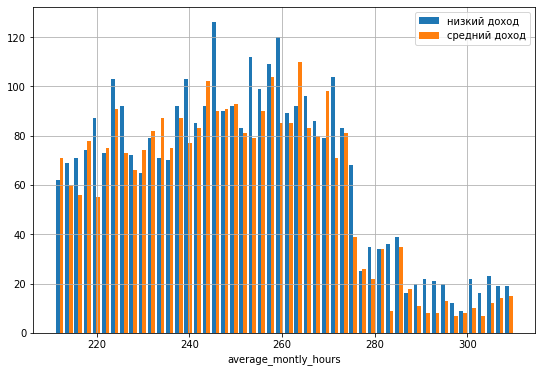

In [36]:
# распределение этих данных также повторяет исходную подвыборку

plt.hist([hours_0, hours_1], bins=50, label=['низкий доход', 'средний доход'])

plt.legend(loc='upper right')
plt.xlabel('average_montly_hours')
plt.grid()

In [37]:
# Т-тест Уэлча

sts.ttest_ind(hours_0, hours_1, equal_var=False)

Ttest_indResult(statistic=3.1673250461898723, pvalue=0.0015459997693760713)

Т.к. значение p-value меньше принятого уровня значимости (5%), нулевая гипотеза отвергается. Это означает, что среднемесячное количество рабочих часов (в диапазоне от 210) у сотрудников с низким и средним уровнем дохода не равно.

### Гипотеза 3. Значения последних оценок у сотрудников, которых повышали и не повышали за последние 5 лет, совпадают.

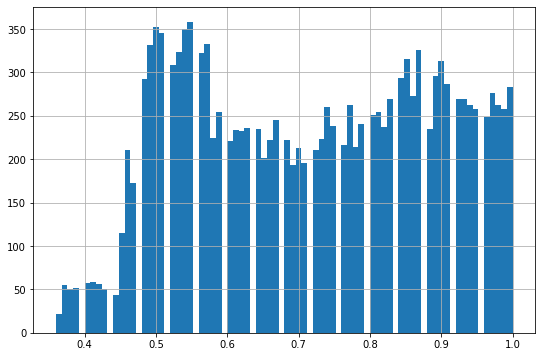

In [38]:
# оценим распределение данных по параметру last_evaluation

plt.hist(df['last_evaluation'], bins=80)
plt.grid()

In [39]:
# оставим те значения, распределение которых приблизительно похоже на нормальное

last = df[(df['last_evaluation'] > 0.45) & (df['last_evaluation'] < 0.6)]

In [40]:
# создадим две выборки: повышали или нет сотрудников за последние 5 лет
# (1 и 0 соответственно)

last_0 = last[last['promotion_last_5years'] == 0]['last_evaluation']
last_1 = last[last['promotion_last_5years'] == 1]['last_evaluation']

In [41]:
# рассчитаем дисперсии

round(statistics.variance(last_0), 4), round(statistics.variance(last_1), 4)

(0.0014, 0.0016)

In [42]:
# определим длину

len(last_0), len(last_1)

(4115, 67)

In [43]:
# т.к. дисперсии практически равны, проведем Т-тест Стьюдента,
# приведя выборки к равной длине (тест "классический")

last_0 = last_0.sample(65)
last_1 = last_1.sample(65)

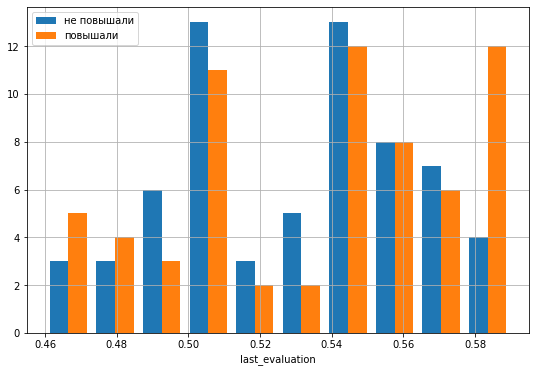

In [44]:
# в распределении этих данных можно увидеть подобие нормальности

plt.hist([last_0, last_1], bins=10, label=['не повышали', 'повышали'])

plt.legend(loc='upper left')
plt.xlabel('last_evaluation')
plt.grid()

In [45]:
# Т-тест Стьюдента

sts.ttest_ind(last_0, last_1)

Ttest_indResult(statistic=-0.8817963399972463, pvalue=0.37953983832764926)

Рассчитанное значение p-value превышает принятый уровень значимости (5%) и это означает, что нулевая гипотеза не отвергается: значение последней оценки (в среднем диапазоне - от 0.45 до 0.6) у сотрудников, которых повышали и не повышали за последние 5 лет, совпадает.

Примечание. Во всех трех гипотезах для каждой из выборок тест на нормальность распределения не проводился (тест Шапиро-Уилка). В данном случае визуальной оценки достаточно, чтобы оценить распределение как "не классическое" нормальное.

## 6. Рассчитать сколько сотрудников работает в каждом департаменте.

In [46]:
# для расчета выберем работающих (не уволенных) сотрудников, сгруппируем данные
# по отделам, подсчитаем количество строк и переименуем итоговый столбец

sales_people = df.loc[df['left'] == 0].groupby('sales').count()[['salary']]
sales_people.columns = ['working']
sales_people

,working
sales,
IT,954
RandD,666
accounting,563
hr,524
management,539
marketing,655
product_mng,704
sales,3126
support,1674


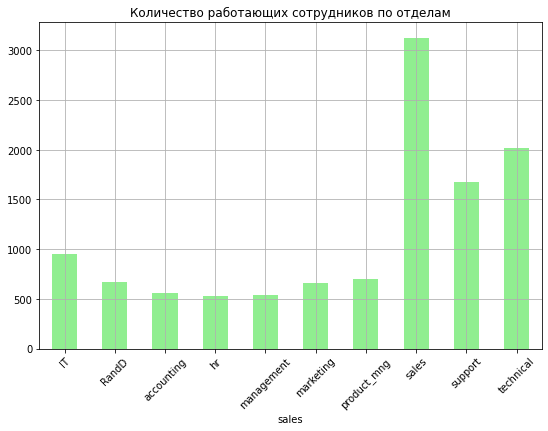

In [47]:
# для наглядности построим график

sales_people.plot(kind='bar', rot=45, color='lightgreen', legend=False)

plt.title('Количество работающих сотрудников по отделам')
plt.grid()


## 7. Показать распределение сотрудников по зарплатам.

In [48]:
# данные по работающим (не уволенным) сотрудникам сгруппируем по уровню дохода,
# подсчитаем количество строк и переименуем итоговый столбец

salary_level = df.loc[df['left'] == 0].groupby('salary').count()[['sales']]
salary_level.columns = ['quantity']
salary_level

,quantity
salary,
high,1155
low,5144
medium,5129


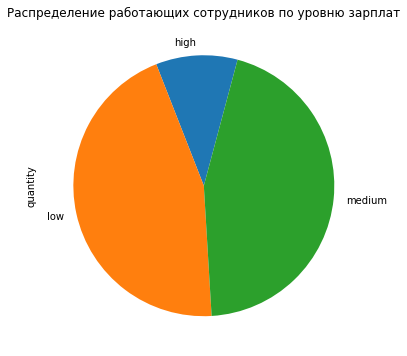

In [49]:
# построим график распределения сотрудников
# (их количество с низким и средним доходом практически одинаково)

salary_level.plot(kind='pie', y='quantity', legend=False, startangle=75)

plt.title('Распределение работающих сотрудников по уровню зарплат')
plt.grid()


## 8. Показать распределение сотрудников по зарплатам совместно с департаментами.

In [50]:
# данные по работающим (не уволенным) сотрудникам сгруппируем по отделам и уровню дохода,
# подсчитаем количество строк, "переместим" зарплату в заголовки и
# переименуем итоговые столбцы, чтобы убрать "лишнее"

sales_salary = df.loc[df['left'] == 0].groupby(['sales', 'salary'])\
                .count().unstack('salary')[['Level_salary']]
                
sales_salary.columns = ['high',	'low',	'medium']
sales_salary

,high,low,medium
sales,,,
IT,79,437,438
RandD,47,309,310
accounting,69,259,235
hr,39,243,242
management,224,121,194
marketing,71,276,308
product_mng,62,346,296
sales,255,1402,1469
support,133,757,784


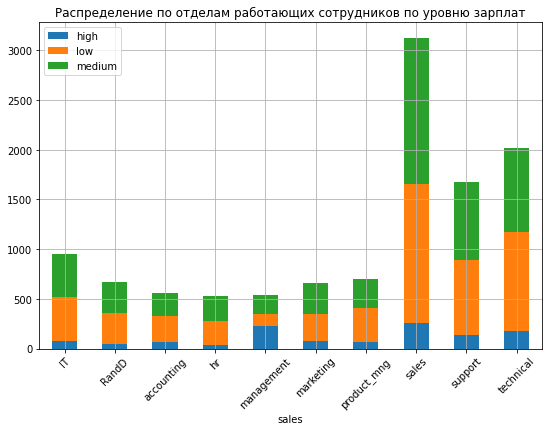

In [51]:
# построим график

sales_salary.plot(kind='bar', rot=45, stacked=True)

plt.title('Распределение по отделам работающих сотрудников по уровню зарплат')
plt.legend(loc='upper left')
plt.grid()

На данном графике отражена общая тенденция распределения работающих сотрудников по зарплатам: с низким и средним доходом в каждом из отделов - примерно поровну. Исключение составляет отдел менеджмента, где сотрудников с высоким доходом наибольшее количество, а низкооплачиваемых - меньше всего.

## 9. Сколько сотрудников покинули компанию.

In [52]:
# определим общее количество уволенных сотрудников

len(df[df['left'] == 1])

3571

In [53]:
# посмотрим на распределение уволенных по отделам:
# подготовим данные и построим график

sales_left = df.loc[df['left'] == 1].groupby('sales').count()[['salary']]
sales_left.columns = ['left']
sales_left

,left
sales,
IT,273
RandD,121
accounting,204
hr,215
management,91
marketing,203
product_mng,198
sales,1014
support,555


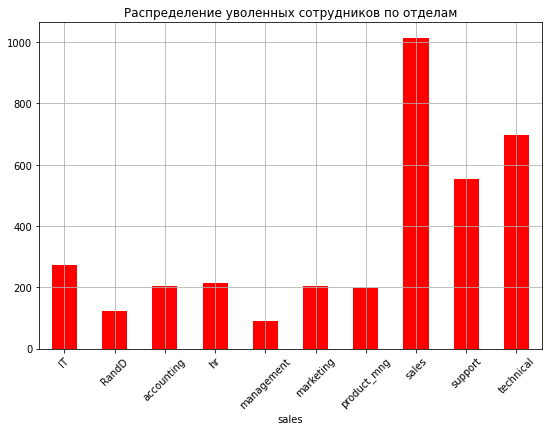

In [54]:
# построим график

sales_left.plot(kind='bar', rot=45, color='red', legend=False)

plt.title('Распределение уволенных сотрудников по отделам')
plt.grid()

Больше всего уволенных приходится на отдел продаж. Чтобы лучше понять ситуацию, построим совместный график работающих и уволенных сотрудников.

In [55]:
# подготовим данные для графика

people = df.groupby(['sales', 'left']).count().unstack('left')[['salary']]
people.columns = ['working', 'left']
people

,working,left
sales,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


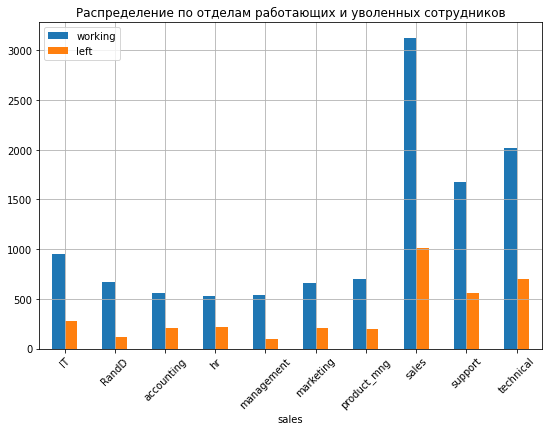

In [56]:
# построим график

people.plot(kind='bar', rot=45)

plt.title('Распределение по отделам работающих и уволенных сотрудников')
plt.legend(loc='upper left')
plt.grid()

In [57]:
# рассчитаем процент уволенных от общего числа сотрудников

round((people['left'] / (people['working'] + people['left'])) * 100, 0)

sales
IT             22.0
RandD          15.0
accounting     27.0
hr             29.0
management     14.0
marketing      24.0
product_mng    22.0
sales          24.0
support        25.0
technical      26.0
dtype: float64

График показывает, что в отделах с наибольшей численностью - отдел продаж, служба поддержки и технический отдел - больше всего уволенных.

Вместе с тем вызывает интерес рассчитанная выше доля уволенных от общего числа сотрудников. В каждом из отделов, кроме двух (RandD  и менеджмент), количество персонала уменьшилась более чем на 20%. Вполне вероятно, что такой большой процент связан не только с личным решением сорудников покинуть компнию, но и в связи с плановой оптимизацией численнности.

In [58]:
# посмотрим на распределение уволенных сотрудников по отделам и проектам в совокупности

sales_proj_left = df.loc[df['left'] == 1].groupby(['sales', 'number_project'])\
                .count().unstack('number_project')[['salary']]
                
sales_proj_left.columns = ['2', '3', '4', '5', '6', '7']
sales_proj_left = sales_proj_left.fillna(0)
sales_proj_left

,2,3,4,5,6,7
sales,,,,,,
IT,114.0,2.0,23.0,51.0,63.0,20.0
RandD,46.0,3.0,14.0,31.0,14.0,13.0
accounting,91.0,2.0,28.0,23.0,45.0,15.0
hr,109.0,7.0,32.0,21.0,33.0,13.0
management,35.0,2.0,13.0,10.0,18.0,13.0
marketing,105.0,3.0,24.0,29.0,27.0,15.0
product_mng,88.0,0.0,19.0,52.0,23.0,16.0
sales,477.0,16.0,116.0,174.0,164.0,67.0
support,238.0,16.0,52.0,107.0,116.0,26.0


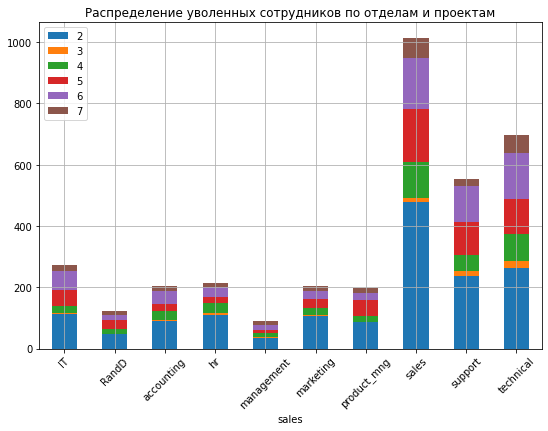

In [59]:
# построим график

sales_proj_left.plot(kind='bar', rot=45, stacked=True)

plt.title('Распределение уволенных сотрудников по отделам и проектам')
plt.legend(loc='upper left')
plt.grid()

График показывает, что в каждом из проектов участвовали все отделы: в каждом из них на каждом проекте (кроме отдела продуктовых менеджеров на 3-м проекте) есть уволенные сотрудники.

Как ранее было определено, на 2-ом и 6-ом проектах - наибольшее количество уволенных, что данный график визуально и подтверждает.

## 10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.

### Гипотеза 1. Уровень удовлетворенности работающих и уволенных сотрудников одинаковый.

In [60]:
# создадим две выборки по категории сотрудников (0 - работает, 1 - уволен)

l_0 = df[df['left'] == 0]['satisfaction_level']
l_1 = df[df['left'] == 1]['satisfaction_level']

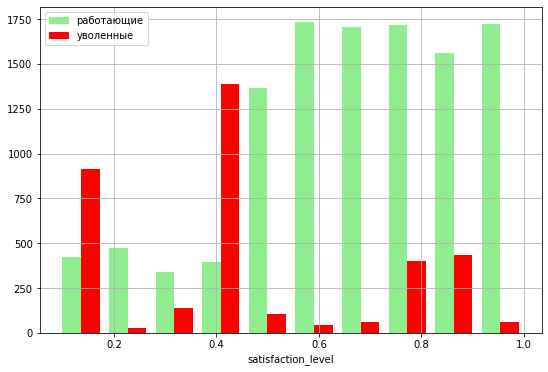

In [61]:
# построим график для этих выборок

plt.hist([l_0, l_1], bins=10, label=['работающие', 'уволенные'], color=['lightgreen', 'red'])

plt.legend(loc='upper left')
plt.xlabel('satisfaction_level')
plt.grid()

In [62]:
# т.к. распределение данных не является нормальным, применим критерий Манна-Уитни

sts.mannwhitneyu(l_0, l_1)

MannwhitneyuResult(statistic=10286473.0, pvalue=0.0)

Принятый уровень значимости (5% или 0.05) очевидно превышает полученное значение p-value. Это означает, что гипотеза отвергается, т.е. средние значения уровня удовлетворенности работающих и уволенных сотрудников не равны (это подтверждается и графически).

Уровень удовлетворенности, по сути, - это "собирательный" показатель, который складывается из оценок многих параметров, в т.ч. продолжительности работы, размера зарплаты и других. Поэтому, с некоторой долей достоверности, по значению данного параметра можно предсказать: продолжит сотрудник работу или уйдет (это для построения модели).

Т.о. можно сделать вывод, что уровень удовлетворенности является одной из причин ухода сотрудников из компании.

### Гипотеза 2. Работающие и уволенные сотрудники проводили на работе равное количество часов в месяц.

In [63]:
# также создадим две выборки по категории сотрудников (0 - работает, 1 - уволен)

le_0 = df[df['left'] == 0]['average_montly_hours']
le_1 = df[df['left'] == 1]['average_montly_hours']

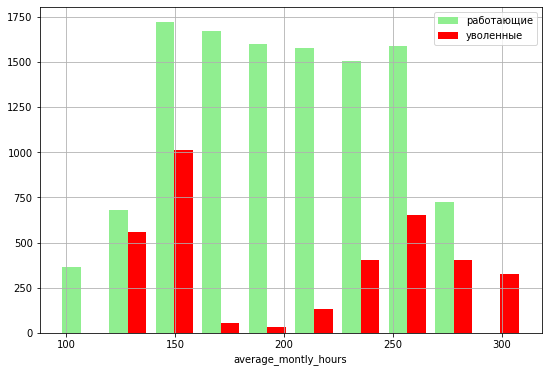

In [64]:
# построим график для выборок

plt.hist([le_0, le_1], bins=10, label=['работающие', 'уволенные'], color=['lightgreen', 'red'])

plt.legend(loc='upper right')
plt.xlabel('average_montly_hours')
plt.grid()

In [65]:
# распределение данных не является нормальным, применим критерий Манна-Уитни

sts.mannwhitneyu(le_0, le_1)

MannwhitneyuResult(statistic=19119787.5, pvalue=6.38478299217712e-09)

Полученное p-value значительно меньше уровня значимости 5% (известно, что чем меньше значение критерия, тем достовернее различия между значениями параметра в выборках). Нулевая гипотеза, соответственно, отвергается, т.е. работающие и уволенные сотрудники проводили на работе разное количество часов в месяц. По графику также видно, что у последних больше переработок, а у части сотрудников - время меньше нормативного: вероятно, их не устроил сам характер работы или они были наняты только на конкретный проект.

Логичен вывод, что количество времени, проводимое на работе, может является одним из критериев принятия решения об уходе.

### Гипотеза 3. Работающих и уволенных сотрудников за последние 5 лет повышали одинаково.

In [66]:
# создадим две выборки по категории сотрудников (0 - работает, 1 - уволен)

lef_0 = df[df['left'] == 0]['promotion_last_5years']
lef_1 = df[df['left'] == 1]['promotion_last_5years']

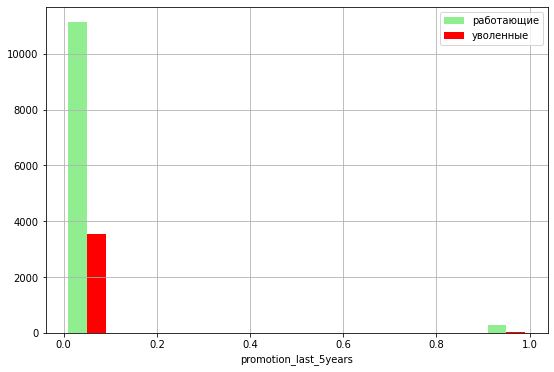

In [67]:
# построим график для выборок

plt.hist([lef_0, lef_1], label=['работающие', 'уволенные'], color=['lightgreen', 'red'])

plt.legend(loc='upper right')
plt.xlabel('promotion_last_5years')
plt.grid()

In [68]:
# применим критерий Манна-Уитни (распределение не является нормальным)

sts.mannwhitneyu(lef_0, lef_1)

MannwhitneyuResult(statistic=19977610.0, pvalue=1.9103960097818644e-14)

Данная гипотеза также отвергается - уровень значимости 5% больше полученного значения p-value, т.е. сотрудников (работающих и уволенных) за последние 5 лет повышали не одинаково.

Повышение, по сути, - факт признания заслуг, способностей и навыков, и если этого не происходит в течение длительного времени, учитывая факт переработок, то у сотрудников закономерно возникает желание сменить работу. А согласно графику в  данной компании случаи повышения вообще большая редкость.

Т.о. отсутствие повышения также можно рассматривать как одну из причин увольнения.

## Дополнение. Модель, предсказывающая увольнение сотрудника.

Учитывая, что в датафрейме между параметрами нет явной линейной зависимости и поставлена задача построить модель, которая предскажет увольнение сотрудника (бинарная логика), воспользуемся методом опорных векторов (для классификации).

Для модели в качестве признаков будем использовать параметры, по которым проверяли гипотезы (п. 10), в качестве целевой переменной - параметр 'left' (0 - работающий, 1 - уволен).

Т.к. пропущенных значений в данных нет, а "выбросы" в 'average_montly_hours' касаются уволенных сотрудников и поэтому их убирать нельзя, дополнительная обработка данных не требуется.

In [69]:
# импортируем необходимые методы

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [70]:
# определим признаки и целевую переменную (метку)

X, y = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years']], df['left']

In [71]:
# разделим данные для обучения (train) и проверки (test) [размер тестовой выборки 20%]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [72]:
# для устойчивого машинного обучения приведем данные к одному масштабу
# сделаем это на обучающей выборке и проверим на тестовой

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [73]:
# переведем полученный массив данных снова в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [74]:
# обучим модель

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [75]:
# оценим качество модели по двум метрикам

from sklearn.metrics import accuracy_score, precision_score

In [76]:
# определим долю "правильных ответов"

accuracy_score(y_test, svc.predict(X_test))

0.8926666666666667

In [77]:
# определим точность предсказания

precision_score(y_test, svc.predict(X_test))

0.8603448275862069

Значения метрик качества говорят о том, что по выбранным трем параметрам - уровень удовлетворенности, количество рабочих часов за месяц и фактор повышения / неповышения - с вероятностью почти 90% можно предсказать уволится сотрудник или нет.

Данная модель не является "окончательной", она лишь подтверждает выводы по ранее выдвинутым гипотезам (п. 10).